# Quality Wine Prediction (Linear Regression)
Updated on 16 Feb 2024

## Import packages

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [13, 10]
plt.rcParams['figure.figsize'] = [7, 5]

## Load data & explore data

In [ ]:
!wget -N https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv


--2024-09-20 07:40:19--  https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7 [following]
--2024-09-20 07:40:19--  https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9bf1f21e6dd8e08a343c2ddba2.dl.dropboxusercontent.com/cd/0/inline/Ca7lRZJIGMqn2-amSWm8N5EmEDNBcqOVQi9BhdVcNwUtzsWnOg7yKc0csNcK_aRRAR0WyE6UcKNtTRGjI7twxZJPYyrKQFHE52bXdjTQOAbJhlnNXqj-_Xd25QZwiBmshZs/file# [following]
--2024-09-20 07:40:20--  https://uc9bf1f21e6dd8e08a343c2ddba2.dl.dropboxusercontent.com/cd/0/inline/C

In [ ]:
column_names = ['FixedAcid', 'VolatileAcidity', 'CriticalAcid', 'ResidualSugar', 'Chlorides', 'FreeSulferDioxide', 'TotalSO2','Density','PH','Sulphates','alcohol','quality']
bos1 = pd.read_csv('winequality_red.csv', header=0, delimiter=r"\;+", names=column_names)

<ipython-input-5-887157184e69>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bos1 = pd.read_csv('winequality_red.csv', header=0, delimiter=r"\;+", names=column_names)


![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

In [ ]:
# data frame with first 5 rows (by default)
bos1.head()

,FixedAcid,VolatileAcidity,CriticalAcid,ResidualSugar,Chlorides,FreeSulferDioxide,TotalSO2,Density,PH,Sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# dimension
bos1.shape

(1599, 12)

In [ ]:
pd.set_option("display.precision", 2)
bos1.describe()

,FixedAcid,VolatileAcidity,CriticalAcid,ResidualSugar,Chlorides,FreeSulferDioxide,TotalSO2,Density,PH,Sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


In [ ]:
# correlation
pd.set_option("display.precision", 2)
bos1.corr(method='pearson')

,FixedAcid,VolatileAcidity,CriticalAcid,ResidualSugar,Chlorides,FreeSulferDioxide,TotalSO2,Density,PH,Sulphates,alcohol,quality
FixedAcid,1.00,-2.56e-01,0.67,1.15e-01,9.37e-02,-1.54e-01,-0.11,0.67,-0.68,1.83e-01,-0.06,0.12
VolatileAcidity,-0.26,1.00e+00,-0.55,1.92e-03,6.13e-02,-1.05e-02,0.08,0.02,0.23,-2.61e-01,-0.20,-0.39
CriticalAcid,0.67,-5.52e-01,1.00,1.44e-01,2.04e-01,-6.10e-02,0.04,0.36,-0.54,3.13e-01,0.11,0.23
ResidualSugar,0.11,1.92e-03,0.14,1.00e+00,5.56e-02,1.87e-01,0.20,0.36,-0.09,5.53e-03,0.04,0.01
Chlorides,0.09,6.13e-02,0.20,5.56e-02,1.00e+00,5.56e-03,0.05,0.20,-0.27,3.71e-01,-0.22,-0.13
FreeSulferDioxide,-0.15,-1.05e-02,-0.06,1.87e-01,5.56e-03,1.00e+00,0.67,-0.02,0.07,5.17e-02,-0.07,-0.05
TotalSO2,-0.11,7.65e-02,0.04,2.03e-01,4.74e-02,6.68e-01,1.00,0.07,-0.07,4.29e-02,-0.21,-0.19
Density,0.67,2.20e-02,0.36,3.55e-01,2.01e-01,-2.19e-02,0.07,1.00,-0.34,1.49e-01,-0.50,-0.17
PH,-0.68,2.35e-01,-0.54,-8.57e-02,-2.65e-01,7.04e-02,-0.07,-0.34,1.00,-1.97e-01,0.21,-0.06
Sulphates,0.18,-2.61e-01,0.31,5.53e-03,3.71e-01,5.17e-02,0.04,0.15,-0.20,1.00e+00,0.09,0.25


In [ ]:
#Correlation with output variable
cor = bos1.corr()
cor_target = abs(cor["quality"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.18]

relevant_features

,quality
VolatileAcidity,0.39
CriticalAcid,0.23
TotalSO2,0.19
Sulphates,0.25
alcohol,0.48
quality,1.00


Index(['FixedAcid', 'VolatileAcidity', 'CriticalAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulferDioxide', 'TotalSO2', 'Density', 'PH',
       'Sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.9818293  0.6709624  0.31803859 4.53639479 5.67501653 1.24939385
 1.51410919 0.07122077 0.19350176 2.42639346 0.86002106 0.21759721]


<Axes: xlabel='quality', ylabel='Count'>

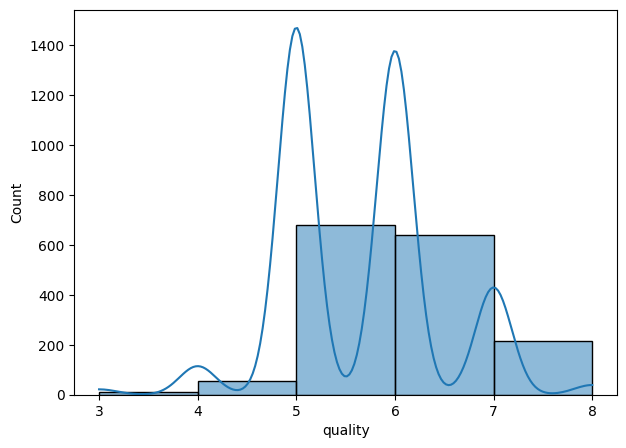

In [ ]:
from scipy import stats
#histogram and normal probability plot
print( bos1.columns )
print( stats.skew(bos1) )
sns.histplot(bos1['quality'], kde=True, binwidth=1)


## Variale selection (manually)

In [ ]:
# variable selection
x = bos1.drop(columns=['quality'])
x = x[[ 'alcohol',"VolatileAcidity","Sulphates","CriticalAcid"]]
#x = x[[ 'alcohol']]

y = bos1["quality"]
print(x.shape)
print(y.shape)

(1599, 4)
(1599,)


## Train / test split

In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 25% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['alcohol', 'VolatileAcidity', 'Sulphates', 'CriticalAcid'], dtype='object')
2.5540592174026497
[ 0.32098678 -1.26431055  0.66267597 -0.03358356]


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.44
909,6,6.19


In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print( "RMSE = ", round(math.sqrt(mse),2) )
print( "Avergae quality =", round(y_test.mean(),2) )

# R^2
print( "R^2 = ", round(model.score(x_test,y_test),2) )

RMSE =  0.72
Avergae quality = 5.58
R^2 =  0.27


In [ ]:
df = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

#max_value = df['Predict'].max()

#print("Maximum value in the 'Predict' column:", max_value)

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.44
909,6,6.19
...,...,...
1528,6,5.86
647,4,5.40
352,5,5.18
116,6,5.48


1)    • Check linearity assumption to target (corr)

จากโมเดลทำนาย quality ของ wine ผมใช้ จัวแปรต้นที่correlation ที่สูงที่สุดเทียบกับตัวแปรต้น มาทำ Single linear regression (alcohol	cor=0.48)


2.Select variables

alcohol	cor=0.48

3.Create model & report equation

quality =1.8013218604082128+0.37071318*alcohol

4.Predict & evaluate RMSE & R2 on test set
จากการทดลองโมเดล single linear regression โมเดลของเรามีประสิทธ์ภาพในการทำนายผลดังนี้

RMSE =  0.77

R^2 =  0.18

5.Are there any predicted value out of range?

ไม่มี

6.Improve your model (post-processing)

จากการ improve ตอนแรกผมเลือกทำเป็นsingle linear regression โดยใช้ตัวแปรต้นคือ alcohol ซึ่งมีcorrelation = 0.48 ซึ่งผมลองพัฒนาโมเดลเรื่อยๆ จนพบว่า ใช้
4ตัวแปรดังนี้

('alcohol', 'VolatileAcidity', 'Sulphates', 'CriticalAcid')

จะได้ค่า R^2 และ RMSE ดีที่สุด

ซึ่งได้สมการดังนี้

quality =2.5540592174026497+ 0.32098678*alcohol-1.26431055*VolatileAcidity -0.03358356*CriticalAcid+ 0.66267597*Sulphates

7.Re-evaluate RMSE & on R-square on test set

จากการ Re evaluate โมเดลโดยทำ multiple linear regression 4ตัวแปรได้ผลลัพธ์ดังนี้

RMSE =  0.72

R^2 =  0.27

